In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import homogeneity_score

In [2]:
data_path = "bbc"
data = load_files(data_path, encoding="utf-8", decode_error="replace", random_state=1000)

In [3]:
data

{'data': ['News Corp eyes video games market\n\nNews Corp, the media company controlled by Australian billionaire Rupert Murdoch, is eyeing a move into the video games market.\n\nAccording to the Financial Times, chief operating officer Peter Chernin said that News Corp is "kicking the tires of pretty much all video games companies". Santa Monica-based Activison is said to be one firm on its takeover list. Video games are "big business", the paper quoted Mr Chernin as saying. We "would like to get into it".\n\nThe success of products such as Sony\'s Playstation, Microsoft\'s X-Box and Nintendo\'s Game Cube have boosted demand for video games.\n\nThe days of arcade classics such as Space Invaders, Pac-Man and Donkey Kong are long gone. Today, games often have budgets big enough for feature films and look to give gamers as real an experience as possible. And with their price tags reflecting the heavy investment by development companies, video games are proving almost as profitable as the

In [4]:
classes = data['target_names']
classes

['business', 'entertainment', 'politics', 'sport', 'tech']

In [5]:
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.head(-5)

,text,label
0,News Corp eyes video games market\n\nNews Corp...,0
1,Wasps 31-37 Leicester\n\nLeicester withstood a...,3
2,Looks and music to drive mobiles\n\nMobile pho...,4
3,'Errors' doomed first Dome sale\n\nThe initial...,2
4,Sculthorpe wants Lions captaincy\n\nPaul Scult...,3
...,...,...
2215,Shares rise on new Man Utd offer\n\nShares in ...,0
2216,SEC to rethink post-Enron rules\n\nThe US stoc...,0
2217,Standard Life concern at LSE bid\n\nStandard L...,0
2218,China 'to overtake US net use'\n\nThe Chinese ...,4


C:\Users\pc\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


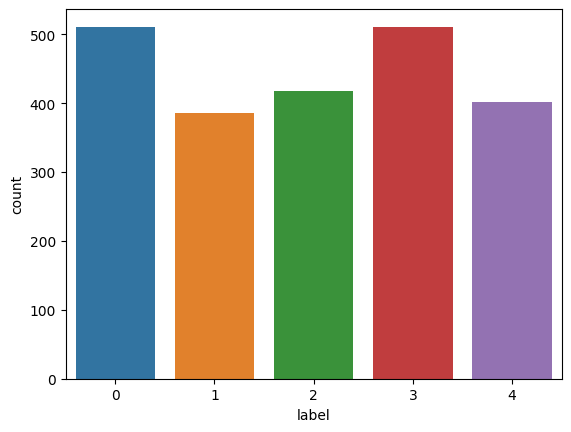

In [6]:
sns.countplot(df['label'])
plt.show()

In [7]:
classes = [classes[i] for i in list(df['label'].value_counts().index)]
classes

['sport', 'business', 'politics', 'tech', 'entertainment']

C:\Users\pc\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


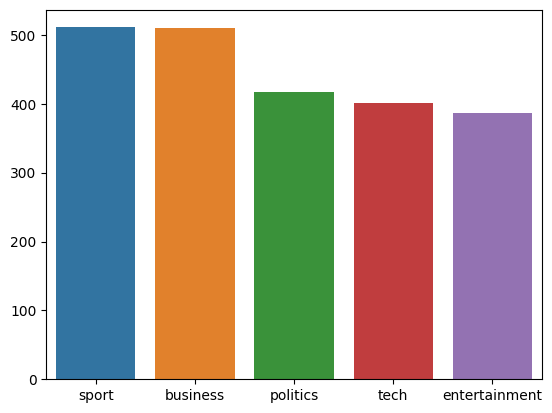

In [8]:
sns.barplot(classes, list(df['label'].value_counts()))
plt.show()

In [9]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df['text'])
print("X Shape", X.shape)
X

X Shape (2225, 29126)


<2225x29126 sparse matrix of type '<class 'numpy.float64'>'
	with 322146 stored elements in Compressed Sparse Row format>

In [10]:
X = X.toarray()
print("X Shape", X.shape)
X

X Shape (2225, 29126)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02280016, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02459015, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
K_means = KMeans(n_clusters=5)
K_means.fit(X)

KMeans(n_clusters=5)

In [12]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=100)
reduced_X = pca.fit_transform(X)
print("reduced_X", reduced_X.shape)
reduced_X

reduced_X (2225, 2)


array([[-0.04277219,  0.06662464],
       [-0.07835577, -0.13051088],
       [-0.07326799,  0.26373002],
       ...,
       [-0.05109815,  0.19521583],
       [-0.07536488, -0.04117384],
       [-0.04190159, -0.06617138]])

In [13]:
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(K_means.cluster_centers_)
reduced_cluster_centers

array([[ 0.0122888 ,  0.04955658],
       [-0.06892197, -0.10376059],
       [-0.06299544, -0.03524603],
       [ 0.25416267, -0.0509887 ],
       [-0.03182322,  0.10369582]])

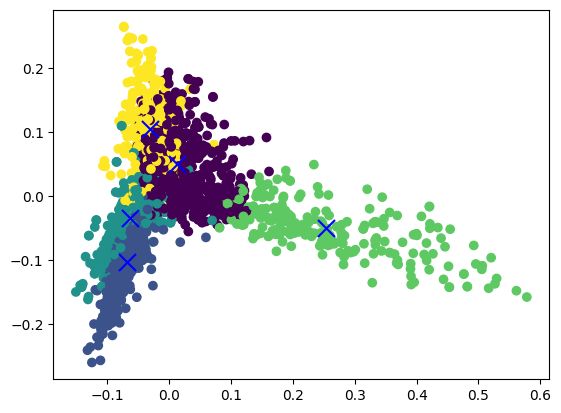

In [14]:
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=K_means.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.show()

In [15]:
homogeneity_score(df.label, K_means.predict(X))

0.7546466832964432